In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_excel("附件一：已结束项目任务数据.xls", names=['order', 'latitude', 'longitude', 'price', 'status'])
data.head()

,order,latitude,longitude,price,status
0,A0001,22.566142,113.980837,66.0,0
1,A0002,22.686205,113.940525,65.5,0
2,A0003,22.576512,113.957198,65.5,1
3,A0004,22.564841,114.244571,75.0,0
4,A0005,22.558888,113.950723,65.5,0


# 聚类

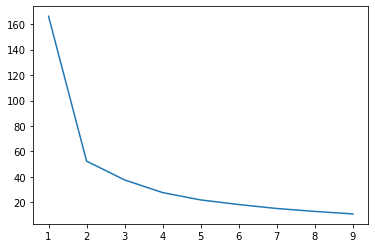

In [3]:
loss = []
for i in range(1,10):
    clf = KMeans(n_clusters=i)
    X = data.latitude.values
    X = X.reshape(X.shape[0], 1)
    Y = data.longitude.values
    Y = Y.reshape(Y.shape[0], 1)
    Z = np.hstack((X, Y))
    clf.fit(Z)
    loss.append(clf.inertia_)
plt.plot(range(1,10), loss)

In [4]:
n_cluster = 6

In [5]:
clf = KMeans(n_clusters=6)
X = data.latitude.values
X = X.reshape(X.shape[0], 1)
Y = data.longitude.values
Y = Y.reshape(Y.shape[0], 1)
Z = np.hstack((X, Y))
clf.fit(Z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [6]:
data.latitude.values[0]

22.566142254795

In [7]:
help(plt.scatter)

Help on function scatter in module matplotlib.pyplot:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=None, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs)
    A scatter plot of *y* vs *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : array_like, shape (n, )
        The data positions.
    
    s : scalar or array_like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : color, sequence, or sequence of color, optional
        The marker color. Possible values:
    
        - A single color format string.
        - A sequence of color specifications of length n.
        - A sequence of n numbers to be mapped to colors using *cmap* and
          *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
    
        Note that *c* should not be a single numeric RGB or RGBA sequen

In [33]:
help(data.melt)

Help on method melt in module pandas.core.frame:

melt(id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None) -> 'DataFrame' method of pandas.core.frame.DataFrame instance
    Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
    
    This function is useful to massage a DataFrame into a format where one
    or more columns are identifier variables (`id_vars`), while all other
    columns, considered measured variables (`value_vars`), are "unpivoted" to
    the row axis, leaving just two non-identifier columns, 'variable' and
    'value'.
    .. versionadded:: 0.20.0
    
    Parameters
    ----------
    id_vars : tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
    var_name : scalar
        Name to use for the 'variable' column. If None it

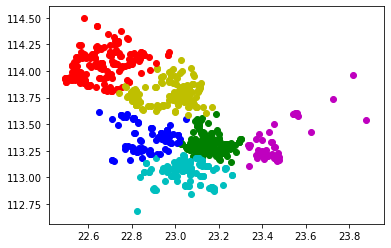

In [8]:
cols=['b','r','y','g','c','m']
cnt = 0
labels=clf.labels_
for lat, lng in zip(data.latitude.values, data.longitude.values):
    #print(lat, lng)
    plt.scatter(lat, lng, c=cols[labels[cnt]])
    cnt = cnt + 1

In [9]:
data['variety']=labels

In [10]:
import folium

In [29]:
clrs=['red','yellow','blue','green','orange','purple']
dis_map = folium.Map(location=[data.latitude[0],data.longitude[0]])

variety_map = folium.map.FeatureGroup()
for i in range(len(data)):
    folium.CircleMarker(
        location=[data.latitude[i], data.longitude[i]],
        color=clrs[data.variety[i]],
        alpha=0.1
    ).add_to(variety_map)
    
dis_map.add_child(variety_map)
dis_map

In [12]:
dis_map.save("地形聚类.html")

In [13]:
dis_map.save("KMeans_cluster_map.html")

In [14]:
data.head()

,order,latitude,longitude,price,status,variety
0,A0001,22.566142,113.980837,66.0,0,1
1,A0002,22.686205,113.940525,65.5,0,1
2,A0003,22.576512,113.957198,65.5,1,1
3,A0004,22.564841,114.244571,75.0,0,1
4,A0005,22.558888,113.950723,65.5,0,1


In [15]:
cluster_centers = clf.cluster_centers_

In [16]:
cluster_centers[2, 0]

22.970200717251274

In [17]:
data2 = data.groupby(['variety'])

In [18]:
data2_mean = data2.mean()
data2_mean

,latitude,longitude,price,status
variety,,,,
0,22.885809,113.372449,69.605000,0.800000
1,22.660482,114.046694,68.342784,0.355670
2,22.970201,113.788403,69.694631,0.973154
3,23.158780,113.315347,66.594241,0.513089
4,23.047051,113.064143,71.507353,0.625000
5,23.468041,113.340218,71.684615,0.692308


In [19]:
data2_std = data2.std()
data2_std

,latitude,longitude,price,status
variety,,,,
0,0.087962,0.114177,3.838465,0.402015
1,0.107819,0.137258,3.968108,0.479954
2,0.107469,0.101733,4.478821,0.162177
3,0.063245,0.079225,2.988842,0.501142
4,0.090555,0.093515,5.885005,0.485913
5,0.102922,0.188817,2.889325,0.465130


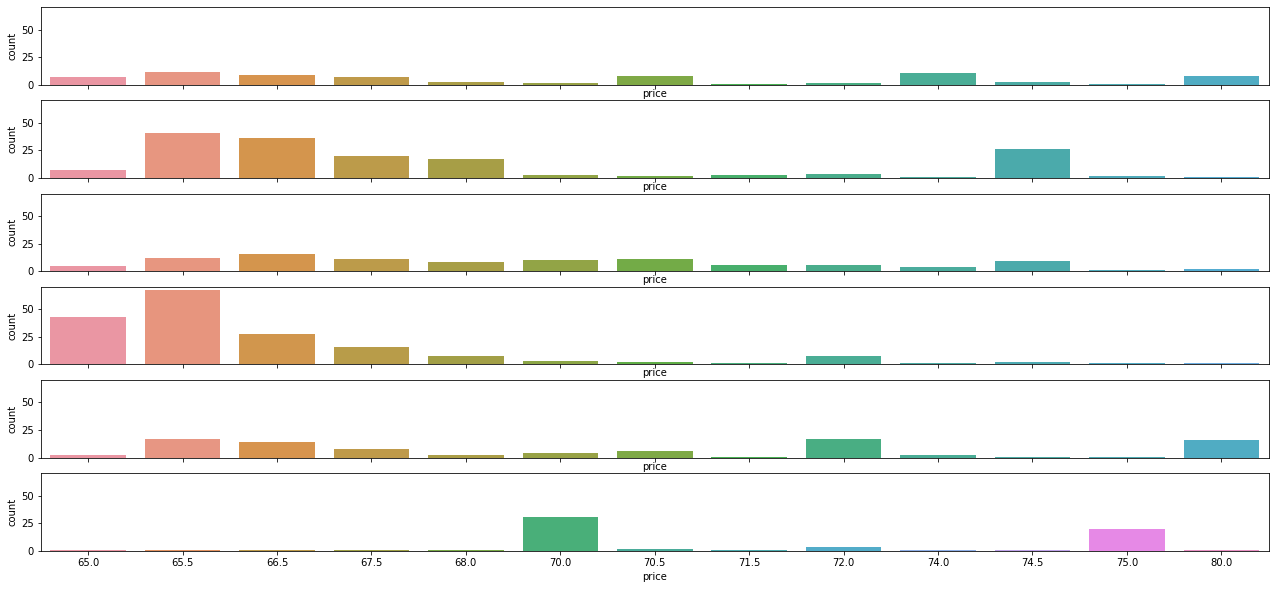

In [20]:
f, axes = plt.subplots(6, 1, figsize=(22, 10), sharex=True, sharey=True)
for i in range(6):
    sns.countplot(x="price", data=data[data.variety == i], ax = axes[i])

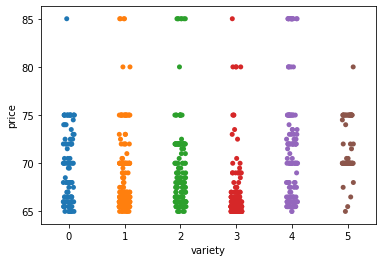

In [21]:
sns.stripplot(x="variety", y="price", data=data)

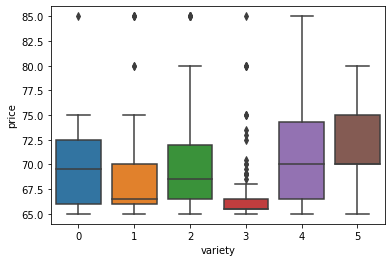

In [22]:
sns.boxplot(x="variety", y="price", data=data)

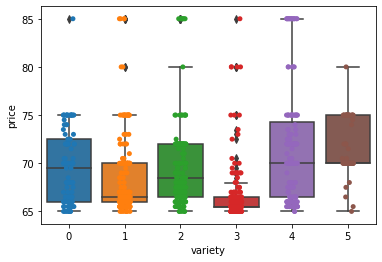

In [23]:
sns.boxplot(x="variety", y="price", data=data)
sns.stripplot(x="variety", y="price", data=data)

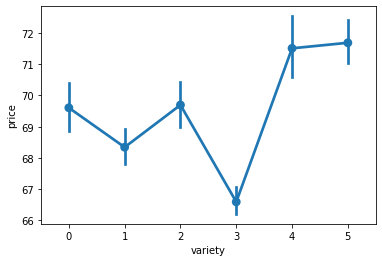

In [24]:
sns.pointplot(x="variety", y="price", data=data)

In [25]:
data2['status'].sum()

variety
0     80
1     69
2    145
3     98
4     85
5     45
Name: status, dtype: int64

In [26]:
finish_rate = data2['status'].sum()/data2.price.count()

In [27]:
finish_rate

variety
0    0.800000
1    0.355670
2    0.973154
3    0.513089
4    0.625000
5    0.692308
dtype: float64

In [31]:
data.corr()

,latitude,longitude,price,status,variety
latitude,1.000000,-0.614414,0.120464,0.195195,0.751434
longitude,-0.614414,1.000000,-0.059689,-0.074870,-0.597869
price,0.120464,-0.059689,1.000000,0.203056,0.129711
status,0.195195,-0.074870,0.203056,1.000000,0.014972
variety,0.751434,-0.597869,0.129711,0.014972,1.000000


# 方差分析

In [44]:
data.describe()

,latitude,longitude,price,status,variety
count,835.000000,835.000000,835.000000,835.000000,835.000000
mean,22.982542,113.537538,69.110778,0.625150,2.316168
std,0.245252,0.372860,4.512772,0.484374,1.481513
min,22.493083,112.683258,65.000000,0.000000,0.000000
25%,22.805711,113.241452,65.500000,0.000000,1.000000
50%,23.014037,113.411547,67.000000,1.000000,2.000000
75%,23.131231,113.856850,71.750000,1.000000,3.000000
max,23.878398,114.493610,85.000000,1.000000,5.000000


In [41]:
data_cpy = data.copy()

In [42]:
data_cpy.drop(['order', 'latitude', 'longitude', 'status'], axis=1, inplace=True)

In [43]:
data_cpy.head()

,price,variety
0,66.0,1
1,65.5,1
2,65.5,1
3,75.0,1
4,65.5,1


In [60]:
data.head()

,order,latitude,longitude,price,status,variety
0,A0001,22.566142,113.980837,66.0,0,1
1,A0002,22.686205,113.940525,65.5,0,1
2,A0003,22.576512,113.957198,65.5,1,1
3,A0004,22.564841,114.244571,75.0,0,1
4,A0005,22.558888,113.950723,65.5,0,1


In [74]:
np.hstack((data[data.variety==0].price.values,data[data.variety==2].price.values)).shape

(249,)

In [80]:
df0 = pd.DataFrame({0:data[data.variety==0].price.values})
df1 = pd.DataFrame({1:data[data.variety==1].price.values})
df2 = pd.DataFrame({2:data[data.variety==2].price.values})
df3 = pd.DataFrame({3:data[data.variety==3].price.values})
df4 = pd.DataFrame({4:data[data.variety==4].price.values})
df5 = pd.DataFrame({5:data[data.variety==5].price.values})

In [40]:
data_cpy_melt

,variable,value
0,price,66.0
1,price,65.5
2,price,65.5
3,price,75.0
4,price,65.5
...,...,...
1665,variety,4.0
1666,variety,0.0
1667,variety,2.0
1668,variety,2.0


In [81]:
df = pd.concat([df0.melt(),df1.melt(),df2.melt(),df3.melt(),df4.melt(),df5.melt()], axis=0)

In [77]:
df

,variable,value
0,0,70.0
1,0,66.5
2,0,70.0
3,0,69.5
4,0,75.0
...,...,...
196,4,75.0
197,4,75.0
198,4,75.0
199,4,72.0


In [82]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('value~C(variable)', data=df).fit()
anova_table = anova_lm(model ,typ=2)
print(anova_table)

                   sum_sq     df          F        PR(>F)
C(variable)   2610.963965    5.0  30.117692  3.520396e-28
Residual     14373.539029  829.0        NaN           NaN


In [ ]:
cluster0 = data[data.status == 0]

In [59]:
data.to_csv("problem1.csv")

In [83]:
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(df['value'], df['variable'])
tukey_result = mc.tukeyhsd(alpha=0.5)
print(tukey_result)

Multiple Comparison of Means - Tukey HSD, FWER=0.50 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -1.2622 0.1364 -2.1581 -0.3664   True
     0      2   0.0896    0.9 -0.8511  1.0304  False
     0      3  -3.0108  0.001  -3.909 -2.1125   True
     0      4   1.9024 0.0073  0.9437   2.861   True
     0      5   2.0796 0.0219  0.9202   3.239   True
     1      2   1.3518 0.0351  0.5591  2.1446   True
     1      3  -1.7485  0.001 -2.4903 -1.0068   True
     1      4   3.1646  0.001  2.3507  3.9784   True
     1      5   3.3418  0.001  2.2989  4.3848   True
     2      3  -3.1004  0.001 -3.8958  -2.305   True
     2      4   1.8127 0.0035  0.9497  2.6757   True
     2      5     1.99  0.017  0.9083  3.0717   True
     3      4   4.9131  0.001  4.0966  5.7296   True
     3      5   5.0904  0.001  4.0454  6.1353   True
     4      5   0.1773    0.9 -0.9201  1.2746  False
----------------------------------------------